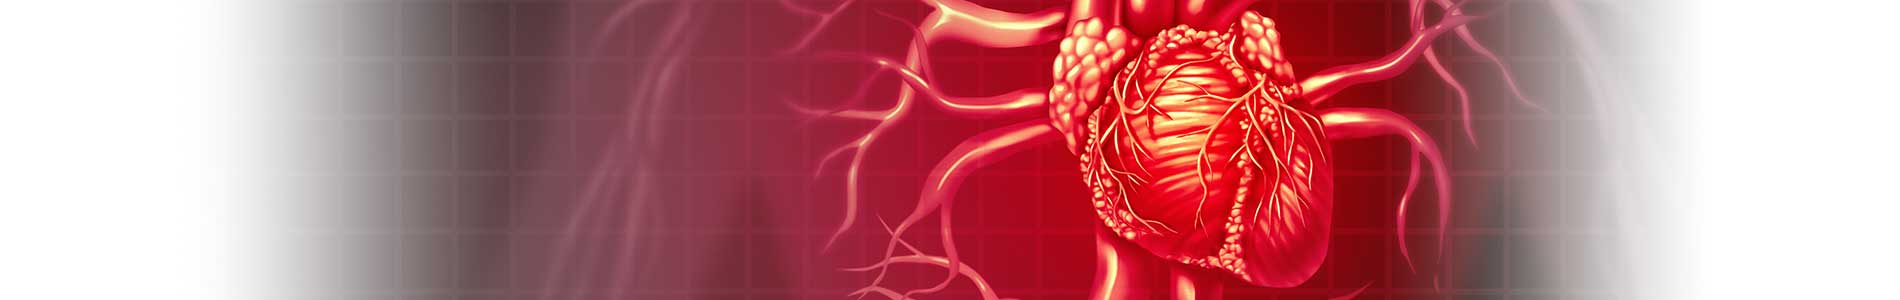

# **Heart Attack Classification problem.**
---

# <p style="background-color: #F65058FF;font-family:Algerian;font-size:150%;text-align:center;color:#28334AFF;border-radius:1000px 50px;">Import Libraries</p>

In [206]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
import joblib 

---

# <p style="background-color: #F65058FF;font-family:Algerian;font-size:150%;text-align:center;color:#28334AFF;border-radius:1000px 50px;">About the data</p>

In [150]:
df = pd.read_csv('heart.csv')

| **Attribute**                             | **Description**                                                        |
|-------------------------------------------|------------------------------------------------------------------------|
| 1. Age                                    | Age of the individual                                                  |
| 2. Sex                                    | Gender of the individual (1 = male, 0 = female)                        |
| 3. cp                                     | Chest Pain Type: 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal pain, 3 = Asymptomatic |
| 4. trestbps                               | Resting blood pressure (in mm Hg)                                      |
| 5. chol                                   | Serum Cholesterol: Cholesterol level in mg/dl                          |
| 6. fbs                                    | Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)                  |
| 7. restecg                                | Resting Electrocardiographic Results: 0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy |
| 8. thalach                                | Maximum heart rate achieved during exercise                            |
| 9. exang                                  | Exercise Induced Angina: 1 = Yes, 0 = No                               |
| 10. oldpeak                               | ST depression induced by exercise relative to rest                     |
| 11. slope                                 | Slope of the ST segment during peak exercise: 0 = Upsloping, 1 = Flat, 2 = Downsloping |
| 12. ca                                    | Number of Major vessels (0-3) colored by fluoroscopy                   |
| 13. thal                                  | 0 = normal; 1 = fixed defect; 2 = reversable defect                    |
| 14. target                                | 0 = Less chance of heart attack, 1 = More chance of heart attack       |


In [151]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---

# <p style="background-color: #F65058FF;font-family:Algerian;font-size:150%;text-align:center;color:#28334AFF;border-radius:1000px 50px;">Data Exploration and EDA</p>

In [152]:
df.duplicated().sum()

1

In [153]:
df = df.drop_duplicates()

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


## Univariate Analysis

- Distribution of Target Column

C:\Users\bios\AppData\Local\Temp\ipykernel_16032\2988915805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


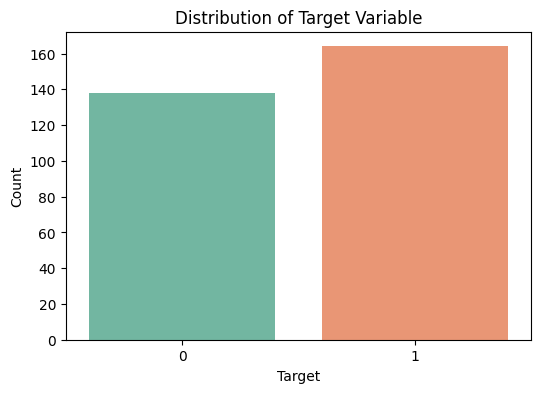

In [155]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [156]:
value_counts = df['target'].value_counts(normalize=True) * 100
value_counts

target
1    54.304636
0    45.695364
Name: proportion, dtype: float64

- The target is balanced 

In [157]:
# To use it if I need to see the percentage with the distribution of the column 
def plot_pie_chart(dataframe, column):
    # Count the unique values
    counts = dataframe[column].value_counts()
    
    plt.figure(figsize=(4, 4))
    plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Distribution of {column}')
    plt.show()

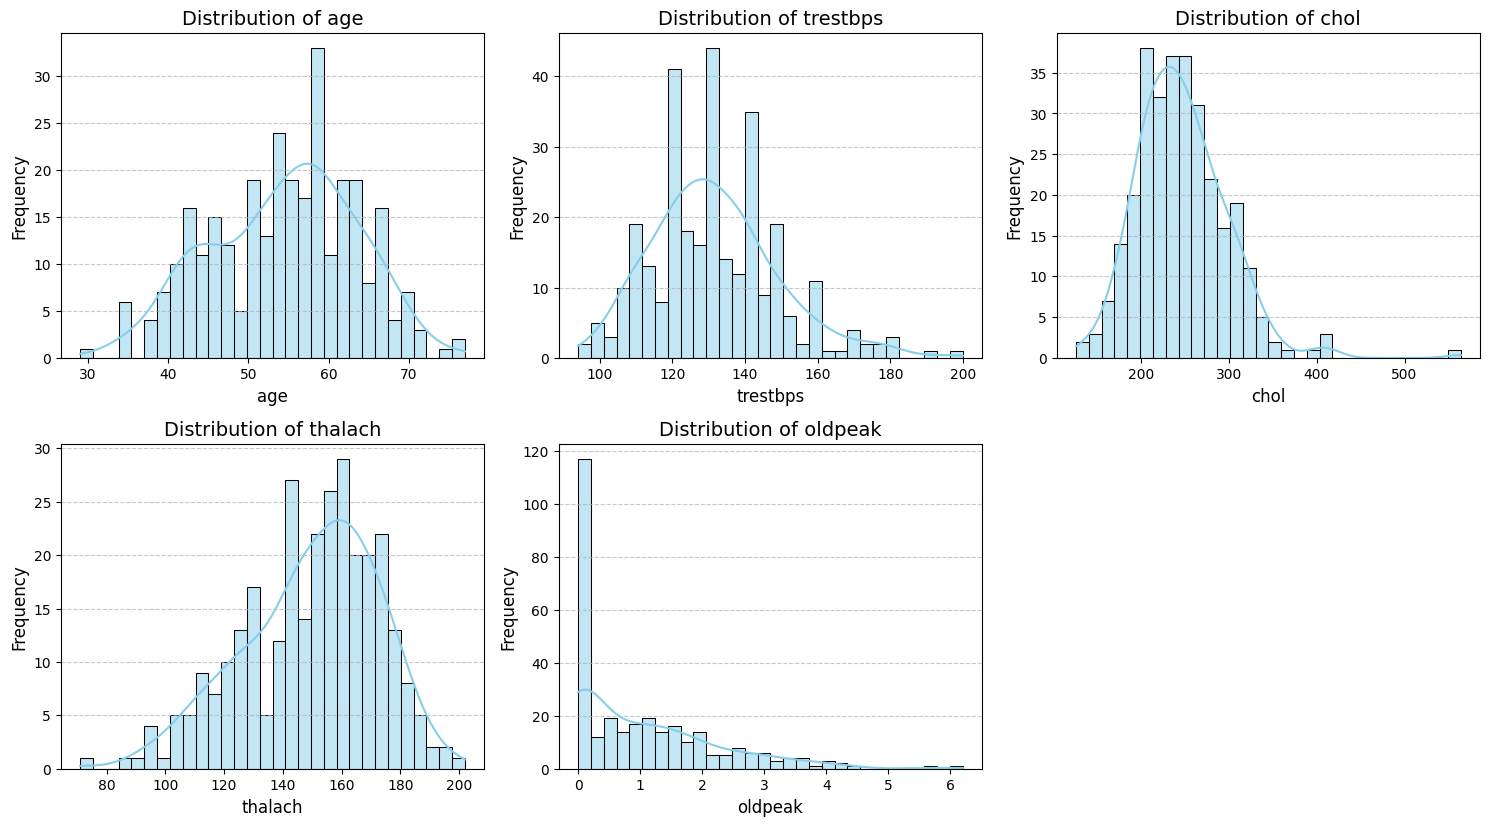

In [158]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove unused subplots if any
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Observations: 
**For 'age' column:** 
- The distribution appears to be roughly bimodal, with peaks around the age groups of 45-50 and 55-60
- higher proportion of individuals are in the older age groups
- The age range spans from approximately 30 to 75 years, with a majority of individuals concentrated between 40 and 70 years old

**For 'trestbps' column: blood pressure during rest (normal is 120)**
- The distribution is roughly positively skewed, This means that there is a longer tail towards the higher blood pressure values
-  The peak of the distribution appears to be around 120-130 mmHg, which is close to the normal range for resting blood pressure. However, the skewness indicates that there are a significant number of individuals with higher resting blood pressure values
- The range of resting blood pressure values is quite wide, spanning from approximately 90 mmHg to 200 mmHg

**For 'chol' column: percentage of the cholesterol in blood (mg/dl)**
- if > 200 is dangerous 
- The peak of the distribution appears to be around 200-250 mg/dl
- The range of cholesterol values is quite wide, spanning from approximately 125 mg/dl to 564 mg/dl.
- 564 mg/dl maybe outlier 

**For 'thalach' column: maximum heart rate achieved**
- The peak of the distribution appears to be around 150-160 bpm: indicates that a significant portion of the population achieved heart rates in this range during exercise
- The range of heart rates is quite wide, spanning from approximately 70 bpm to 200 bpm

**For 'oldpeak' column: ST depression induced by exercise relative to rest**
- The data is heavily right-skewed. Most values are concentrated near 0, and the frequency rapidly declines as oldpeak increases
- A significant number of observations have an oldpeak value of less than 1, indicating that ST depression levels close to 0 are most common in this dataset
- There are very few instances with oldpeak values greater than 4, making these outliers or less frequent cases



## outliers 

In [159]:
# Check the outlier in 'chol' column 
outlier_chol = df[df['chol'] > 400]
outlier_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


It seem unusual for someone to have a cholesterol level (chol) over 400 and not have a heart attack (target = 0)

but after search I found there are few reasons why someone with high cholesterol might not experience a heart attack
like blood pressure, age, family history, smoking, and physical activity can play a larger role in heart disease risk

There are two types of cholesterol: The type of cholesterol matters. For example, high levels of LDL ("bad" cholesterol) are more concerning, while high HDL ("good" cholesterol) can offer protective benefits

- **so we will discover if there values are outliers or not during Multivariate Analysis**

In [160]:
# Check the outlier in 'oldpeak' column 
outlier_oldpeak = df[df['oldpeak'] > 4]
outlier_oldpeak

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


there are high oldpeak values (like 6.2 and 5.6) with target = 0, meaning these individuals didn't have a heart attack (target = 0) despite the high

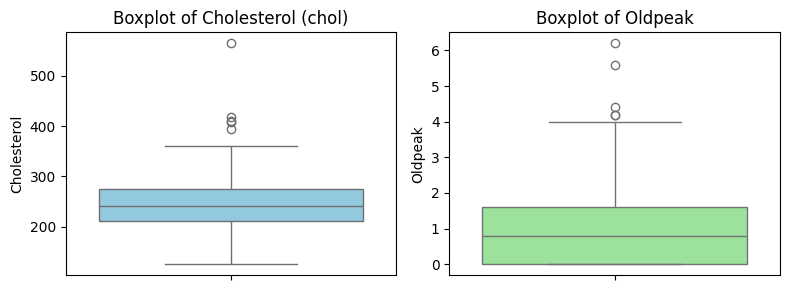

In [161]:
plt.figure(figsize=(8, 3))

# Boxplot for 'chol'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['chol'], color='skyblue')
plt.title('Boxplot of Cholesterol (chol)')
plt.ylabel('Cholesterol')

# Boxplot for 'oldpeak'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['oldpeak'], color='lightgreen')
plt.title('Boxplot of Oldpeak')
plt.ylabel('Oldpeak')

# Show the plots
plt.tight_layout()
plt.show()


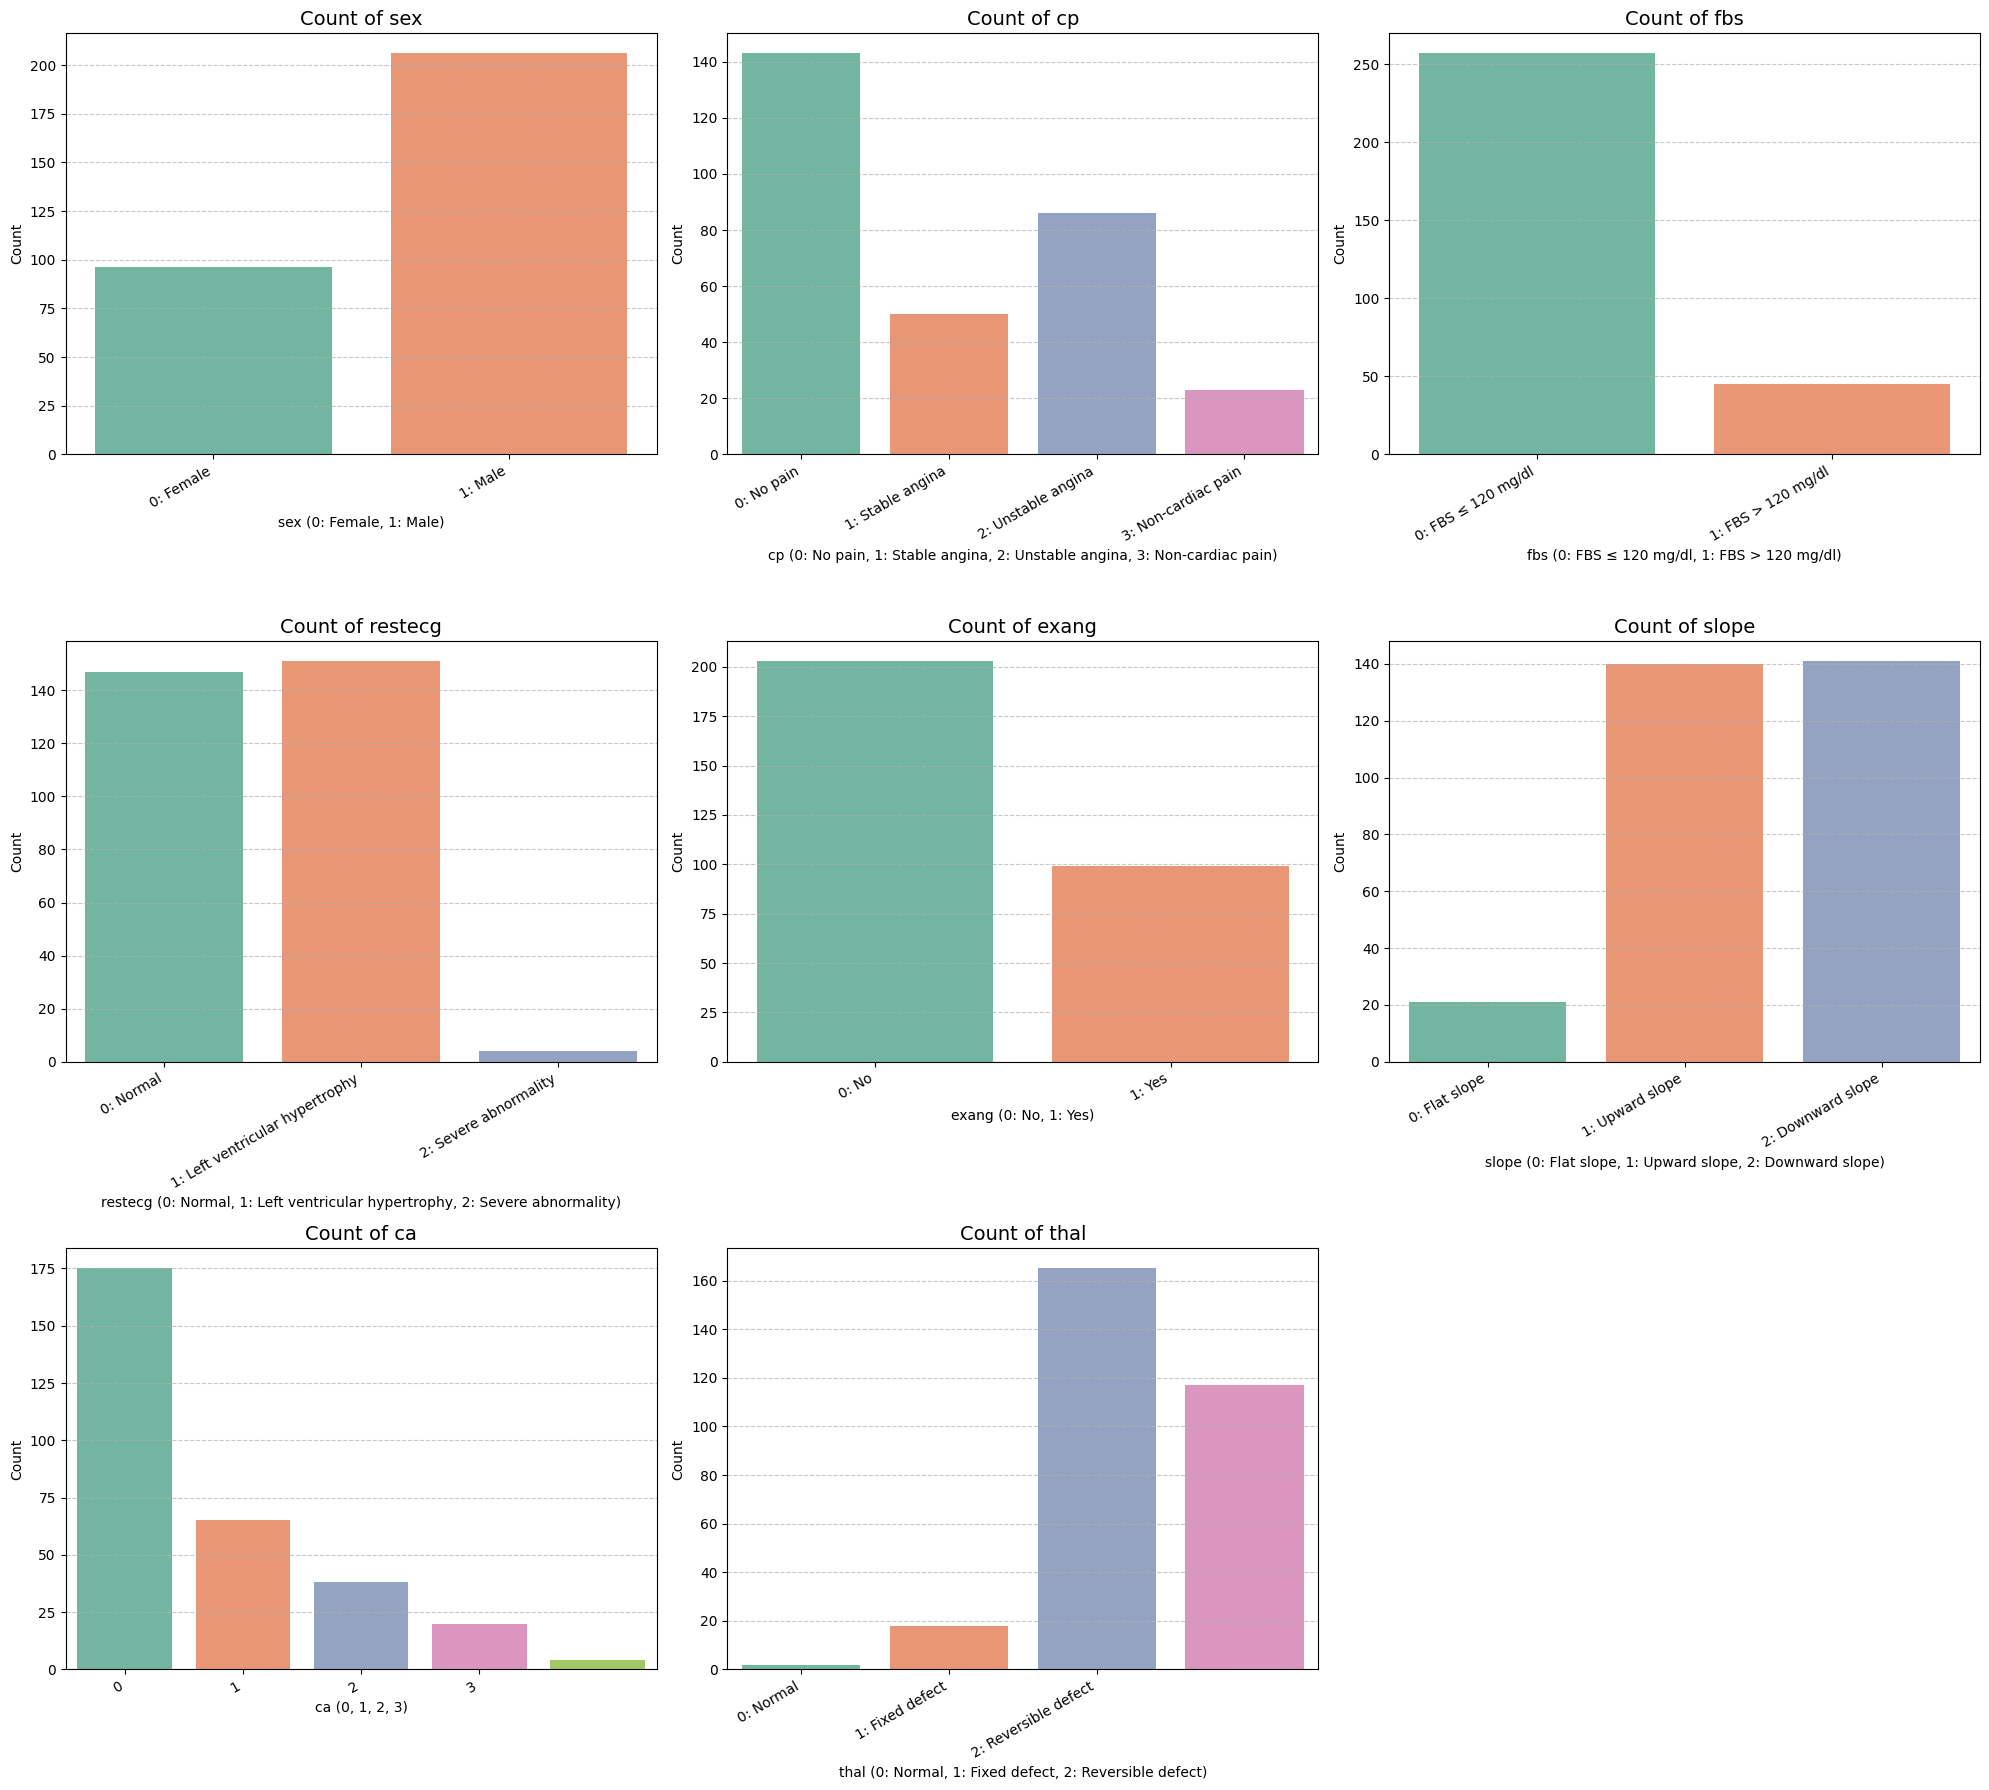

In [162]:
categorical_cols = {
    'sex': ['0: Female', '1: Male'],
    'cp': [
        '0: No pain', 
        '1: Stable angina', 
        '2: Unstable angina', 
        '3: Non-cardiac pain'
    ],
    'fbs': ['0: FBS ≤ 120 mg/dl', '1: FBS > 120 mg/dl'],
    'restecg': [
        '0: Normal', 
        '1: Left ventricular hypertrophy', 
        '2: Severe abnormality'
    ],
    'exang': ['0: No', '1: Yes'],
    'slope': [
        '0: Flat slope', 
        '1: Upward slope', 
        '2: Downward slope'
    ],
    'ca': ['0', '1', '2', '3'],
    'thal': [
        '0: Normal', 
        '1: Fixed defect', 
        '2: Reversible defect'
    ]
}

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

# Loop through each categorical column and plot
for idx, (col, categories) in enumerate(categorical_cols.items()):
    sns.countplot(data=df, x=col, hue=col, palette='Set2', ax=axes[idx], legend=False)
    
    # Custom labels and formatting
    axes[idx].set_title(f'Count of {col}', fontsize=14)
    axes[idx].set_xlabel(f'{col} ({", ".join(categories)})', fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_xticks(range(len(categories)))
    axes[idx].set_xticklabels(categories, rotation=30, ha='right')
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any extra subplots if columns < 9
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Observations: 
**For 'sex' column:** 
- Women are officially having more heart attacks than men. This doesn't mean it is destined to happen to any female, but chances of suffering from a heart attacked are increased if you are female but here in data we have more male data

**For 'cp' column:** 
- The majority of individuals fall under the "No Pain" category, indicating that a large portion of the dataset consists of individuals without chest pain symptoms
- Do people with no pain (0) have lower probabilities of heart disease?

**For 'fbs' column:** 
- The majority have 120 or less so it is normal 

**For 'restecg' column:**
- The data is nearly balanced between the "Normal" (0) and "Left Ventricular Hypertrophy" (1) categories
- Severe Abnormality (2): Rare cases that might be associated with critical heart issues or a strong indicator of disease, it could indicate life-threatening issues

**For 'exang' column:** 
- Here I must see if there any correlation between it and the target 

**For 'slope' column:** 
- The data is nearly balanced between the "upward slope" (1) and "Downward slope" (2) categories

**For 'ca' column:**
- Here I must see if there any correlation between it and the target 
- I think there are outliers in this column 

**For 'thal' column:**
- I think there are outliers in this column 

In [163]:
def get_unique_values(dataframe):
    unique_values = {}
    for column in dataframe.columns:
        unique_values[column] = dataframe[column].unique().tolist()
    return unique_values

In [164]:
unique_vals = get_unique_values(df[['ca', 'thal']])
for column, values in unique_vals.items():
    print(f"{column}: {values}\n")

ca: [0, 2, 1, 3, 4]

thal: [1, 2, 3, 0]



In [165]:
# Check the outlier in 'ca' column 
outlier_ca = df[df['ca'] == 4]
outlier_ca

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


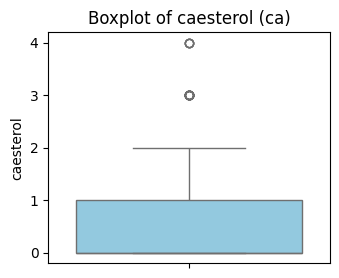

In [166]:
plt.figure(figsize=(8, 3))
# Boxplot for 'ca'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['ca'], color='skyblue')
plt.title('Boxplot of caesterol (ca)')
plt.ylabel('caesterol')
plt.show()

# Multivariate Analysis

- ### Heatmap and correlation 

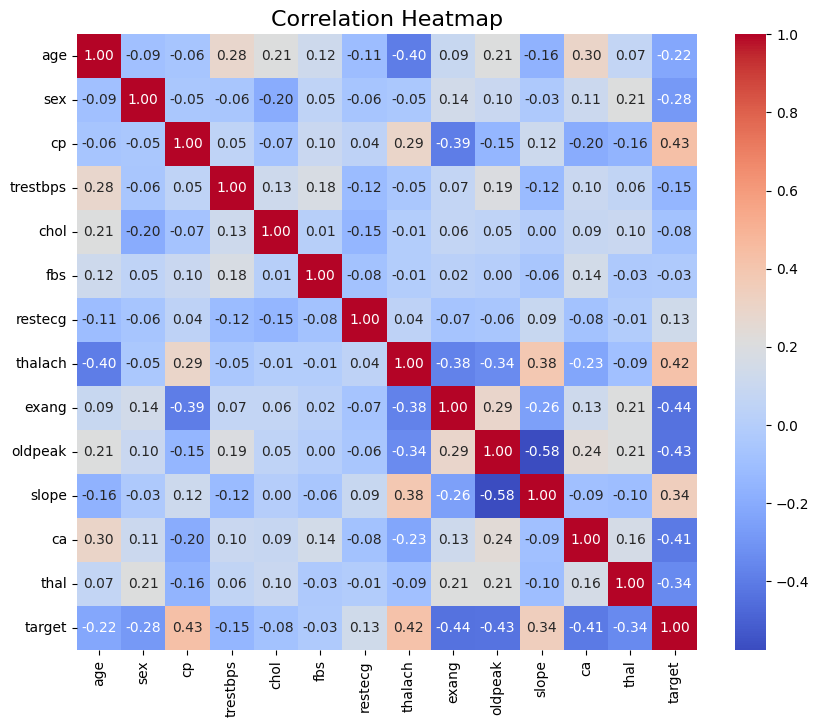

In [167]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

#### **Observations on the Correlation Matrix**
For **'age'** column: 
- Moderate positive correlation with ca (0.30) and trestbps (0.28)
- Negative correlation with thalach (-0.39), indicating that older individuals may have lower maximum heart rates

For **'Ca'** (Number of Major Vessels):
- Moderate negative correlation with target (-0.41), suggesting that a higher number of major vessels detected is associated with a lower likelihood of heart disease

For **'chol'** (Cholesterol): 
- Weak correlations overall, but slight positive correlation with age (0.21) and trestbps (0.13)
- Weak negative correlation with sex (-0.20), implying minor differences in cholesterol levels between genders

For **'Cp'** (Chest Pain Type):
- Positive correlation with target (0.43), indicating that certain types of chest pain might be associated with higher chances of heart disease
- Negatively correlated with exang (-0.39), implying that exercise-induced angina is less common with certain chest pain types
- Positively correlated with thalach (0.29), suggesting that higher maximum heart rates are associated with specific chest pain types.

For **'Exang'** (Exercise-Induced Angina): 
- Strong negative correlation with target (-0.44), indicating that exercise-induced angina is more likely in patients without heart disease
- Negatively correlated with thalach (-0.38), showing that exercise-induced angina may result in lower maximum heart rates

For **'Oldpeak'** (ST Depression Induced by Exercise):
- Strong negative correlation with slope (-0.58) and target (-0.43), suggesting that a higher ST depression indicates a lower likelihood of heart disease
- Negative correlation with thalach (-0.34), indicating that a higher ST depression might be associated with a reduced maximum heart rate

For **'Target (Diagnosis of Heart Disease):'**
- Strong positive correlation with cp (0.43) and negative correlations with exang (-0.44), oldpeak (-0.43), and ca (-0.41)

**Strong Correlations**: 
- oldpeak and slope (-0.58)
- cp and target (0.43)
- exang and target (-0.44)
- thalach shows the strongest correlations with age (-0.39) and exang (-0.38)

**Weak Correlations**:
- Most correlations involving fbs (fasting blood sugar) are close to 0, indicating little relationship with other features
- chol has weak correlations with all other features, suggesting it might be less relevant in this dataset

**Notes**: 
- Features with high correlations among themselves like oldpeak and slope with -0.576 but it can't lead to multicollinearity so it can't impact the performance of linear models like Logistic Regression
- I will start by including all features in my initial model to create a baseline then experiment with feature selection to see if performance improves


- ### Relationship Between Features and Target

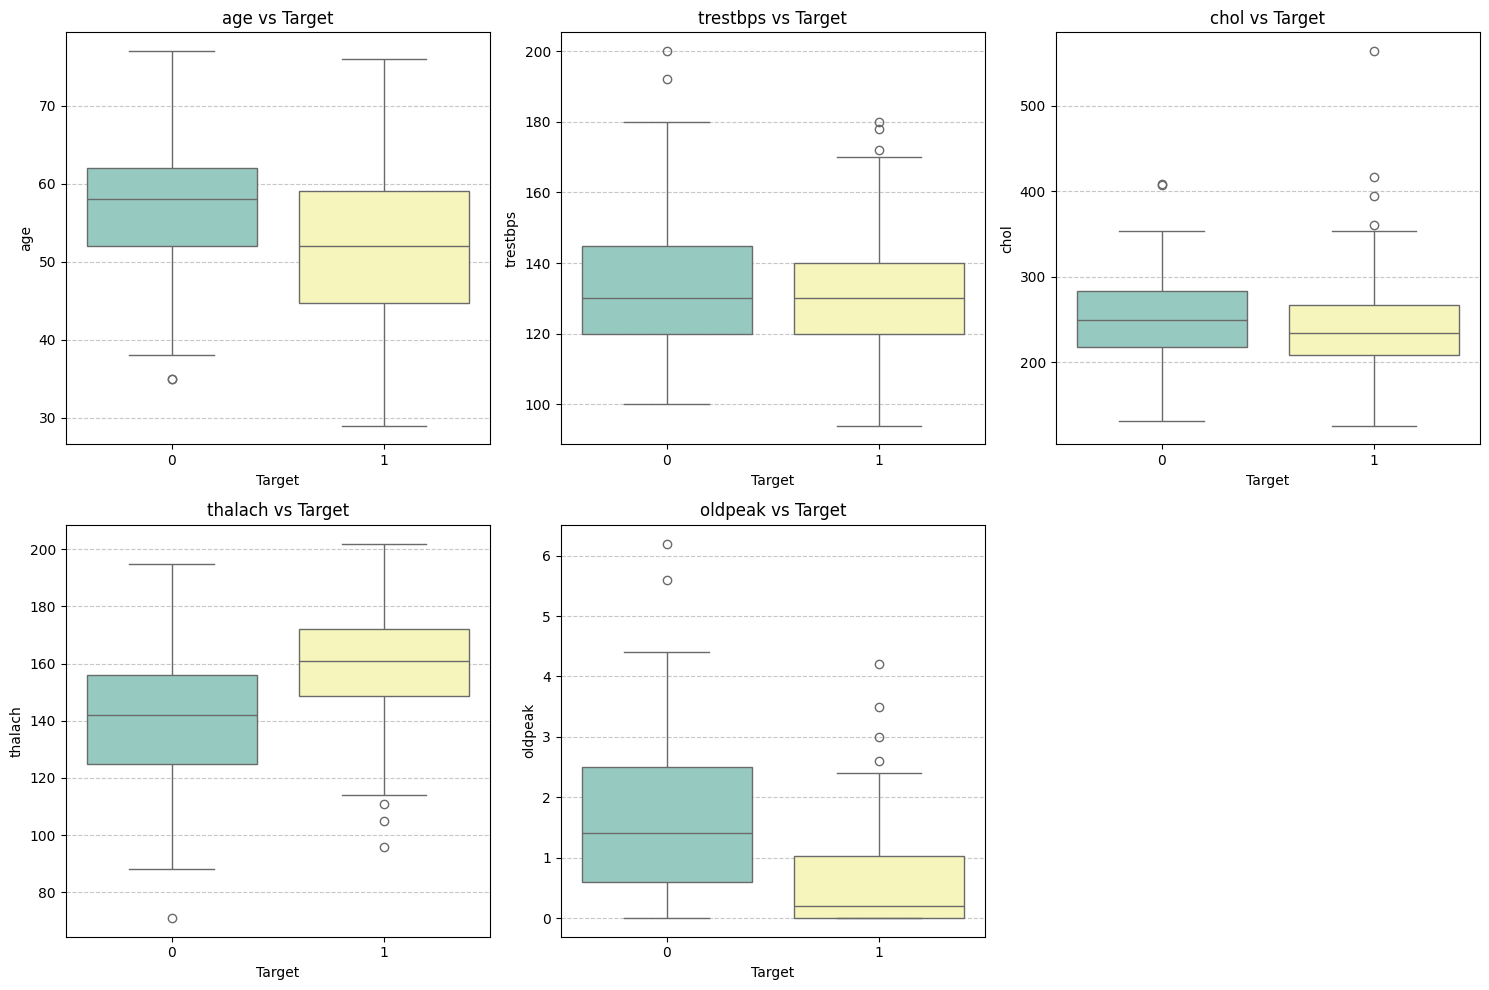

In [168]:
num_cols = 3
num_rows = -(-len(numerical_cols) // num_cols) 

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  

# Plot boxplots for each numerical column
for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='target', y=col, hue='target', palette='Set3', ax=axes[idx], legend=False)
    axes[idx].set_title(f'{col} vs Target', fontsize=12)
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Observations**: 
- The outliers in 'thalach', 'trestbps', some in 'oldpeak', 'age' are actual outliers, no need to remove 

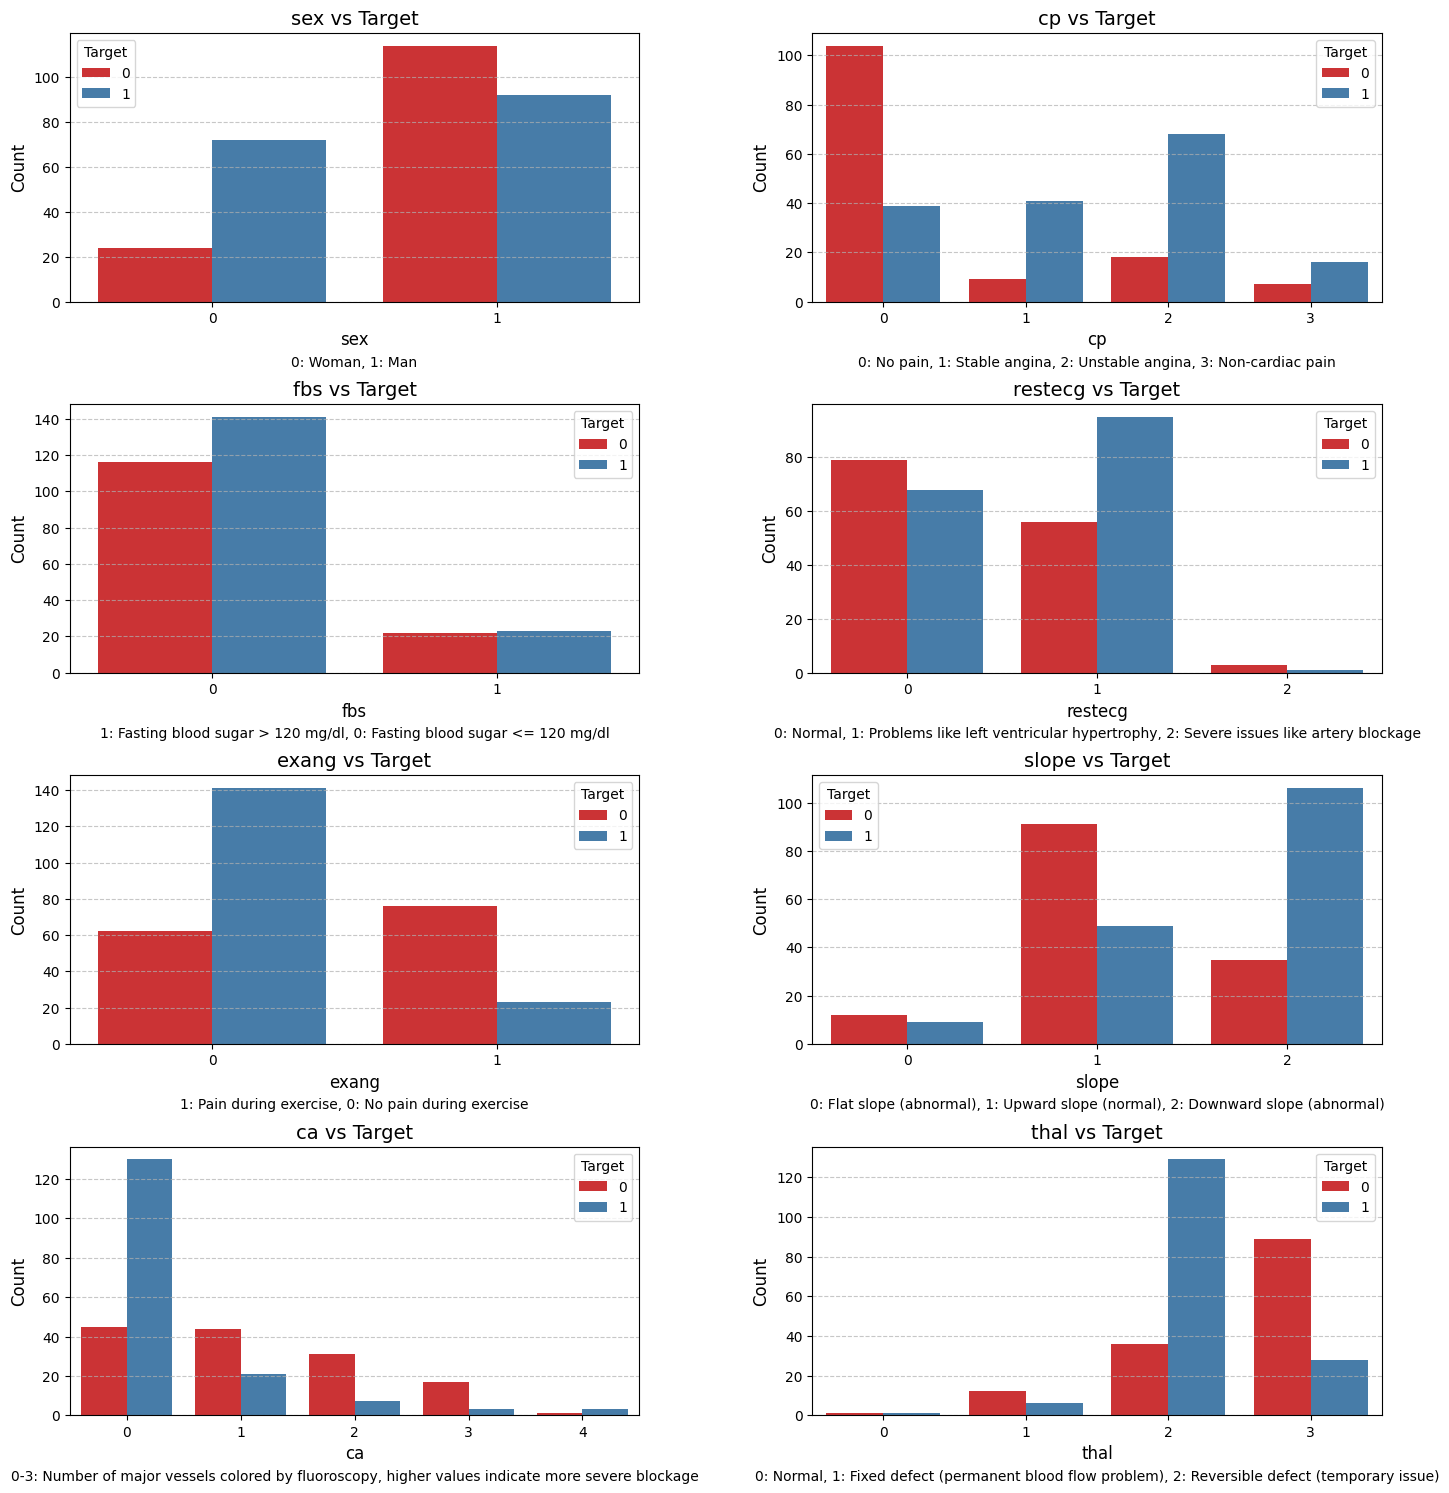

In [169]:
num_cols = 2
num_rows = -(-len(categorical_cols) // num_cols)  

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten() 

# Plot countplots for each categorical column
for idx, col in enumerate(categorical_cols):
    if col != 'target':  
        sns.countplot(data=df, x=col, hue='target', palette='Set1', ax=axes[idx])
        axes[idx].set_title(f'{col} vs Target', fontsize=14)
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel('Count', fontsize=12)
        axes[idx].legend(title='Target')
        axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

        
        if col == 'sex':
            explanation = "0: Woman, 1: Man"
        elif col == 'cp':
            explanation = "0: No pain, 1: Stable angina, 2: Unstable angina, 3: Non-cardiac pain"
        elif col == 'fbs':
            explanation = "1: Fasting blood sugar > 120 mg/dl, 0: Fasting blood sugar <= 120 mg/dl"
        elif col == 'restecg':
            explanation = "0: Normal, 1: Problems like left ventricular hypertrophy, 2: Severe issues like artery blockage"
        elif col == 'exang':
            explanation = "1: Pain during exercise, 0: No pain during exercise"
        elif col == 'slope':
            explanation = "0: Flat slope (abnormal), 1: Upward slope (normal), 2: Downward slope (abnormal)"
        elif col == 'ca':
            explanation = "0-3: Number of major vessels colored by fluoroscopy, higher values indicate more severe blockage"
        elif col == 'thal':
            explanation = "0: Normal, 1: Fixed defect (permanent blood flow problem), 2: Reversible defect (temporary issue)"
        
        
        axes[idx].text(0.5, -0.2, explanation, ha='center', va='top', transform=axes[idx].transAxes, fontsize=10, color='black')

# Turn off unused subplots
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Observations**: 

For 'sex' with target: 
- The plot shows that a higher proportion of males have a "more chance" of heart attack compared to females but this plot beacuse we have more data about male than female 

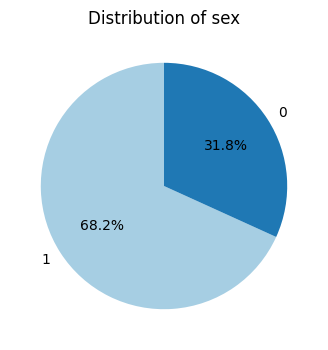

In [170]:
plot_pie_chart(df, 'sex')
# 0: Female 
# 1: Male

For **cp (chest pain type) vs Target**: 
- The distribution of heart attack risk varies across different chest pain types.
- Individuals with chest pain type 2 (unstable angina) appear to have a higher proportion of "more chance" of heart attack compared to other chest pain types

For **fbs (fasting blood sugar) vs Target**: 
- Individuals with fasting blood sugar > 120 mg/dl (fbs = 1) seem to have a slightly higher proportion of "more chance" of heart attack compared to those with fasting blood sugar <= 120 mg/dl (fbs = 0)

For **restecg (resting electrocardiographic results) vs Target**:
- Individuals with resting ECG results indicating problems like left ventricular hypertrophy (restecg = 1) appear to have a higher proportion of "more chance" of heart attack compared to those with normal ECG results (restecg = 0)

**General observation:**
- These visualizations suggest that sex, chest pain type, fasting blood sugar, and resting ECG results might be associated with an increased risk of heart attack


---

# <p style="background-color: #F65058FF;font-family:Algerian;font-size:150%;text-align:center;color:#28334AFF;border-radius:1000px 50px;">Data Preprocessing</p>

In this stage, I will prepare the data for the model 

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [173]:
def get_unique_values(df_subset):
    unique_vals = {}
    for column in df_subset.columns:
        unique_vals[column] = df_subset[column].value_counts()
    return unique_vals

# Apply the function to the selected columns
unique_vals = get_unique_values(df[['sex','ca', 'thal', 'cp', 'fbs', 'restecg','exang', 'slope', 'target']])

# Display the unique value counts for each column
for column, values in unique_vals.items():
    print(f"{column}:\n{values}\n")

sex:
sex
1    206
0     96
Name: count, dtype: int64

ca:
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64

thal:
thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

cp:
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

fbs:
fbs
0    257
1     45
Name: count, dtype: int64

restecg:
restecg
1    151
0    147
2      4
Name: count, dtype: int64

exang:
exang
0    203
1     99
Name: count, dtype: int64

slope:
slope
2    141
1    140
0     21
Name: count, dtype: int64

target:
target
1    164
0    138
Name: count, dtype: int64



- ### Removing the outliers 

In [174]:
# Outliers in 'chol' column 
outlier_chol
# after search, I found this value of chol is the sum of all types of chol (good and Bad), But the value should not exceed 400 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [175]:
df = df[df['chol'] <= 400]
print(df['chol'].max())

394


In [176]:
outlier_ca

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [177]:
# I got in data desciption that there are number of major vessels (0-3) colored by flourosopy
# so I will remove ca = 4
df = df[df['ca'] < 4]
print(df['ca'].max())


3


In [178]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Missing values 

- ### Split the data 

In [179]:
y = df['target']                 # Target variable
X = df.drop(columns=['target'])  # Features

In [180]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [181]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((220, 13), (220,), (74, 13), (74,))

---

# <p style="background-color: #F65058FF;font-family:Algerian;font-size:150%;text-align:center;color:#28334AFF;border-radius:1000px 50px;">Models</p>

Evaluation Metrics:
- For this heart attack classification task, I chose accuracy as the primary evaluation metric
- Accuracy is suitable because the dataset is balanced, meaning the classes have nearly equal representation
- In a balanced dataset, accuracy effectively reflects the model's ability to correctly classify instances
- Additionally, other metrics like precision, recall, and F1-score are calculated to provide deeper insights into the model's performance
especially in case the class distribution changes or for understanding specific aspects like false positives or false negatives


- ### Baseline Model: Logistic Regression 

In [109]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [110]:
log_reg.fit(X_train, y_train)

C:\Users\bios\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [111]:
y_pred = log_reg.predict(X_test)

In [112]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.87      0.81      0.84        32

    accuracy                           0.83        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.83      0.83      0.83        59


Confusion Matrix:
[[23  4]
 [ 6 26]]


- The overall accuracy is 83%, which indicates that the model correctly classified 83% of the samples

For F1-Score:

- Both classes have similar F1-scores (0.82 for Class 0 and 0.84 for Class 1), indicating a good balance between precision and recall

For Confusion Matrix: 
- True Positives (TP): 26 (Model correctly predicted "more chance of heart attack" for 26 cases)
- True Negatives (TN): 23 (Model correctly predicted "less chance of heart attack" for 23 cases)
- False Positives (FP): 4 (Model predicted "more chance of heart attack," but it was actually "less chance of heart attack")
- False Negatives (FN): 6 (Model predicted "less chance of heart attack," but it was actually "more chance of heart attack")


- For Precision here: Measures the proportion of true positive predictions out of all predictions for the positive class >> High precision means fewer false positives (less incorrect prediction of "more chance of heart attack")
- For Recall here: Measures the proportion of actual positives that were correctly identified >> High recall means fewer false negatives (less missing cases of "more chance of heart attack")

**We should focus on recall because Missing a "more chance of heart attack" case (False Negative) is critical, as it could lead to serious health risks**

#### I will try cross validation Technique and Grid Search to improve the accuracy 

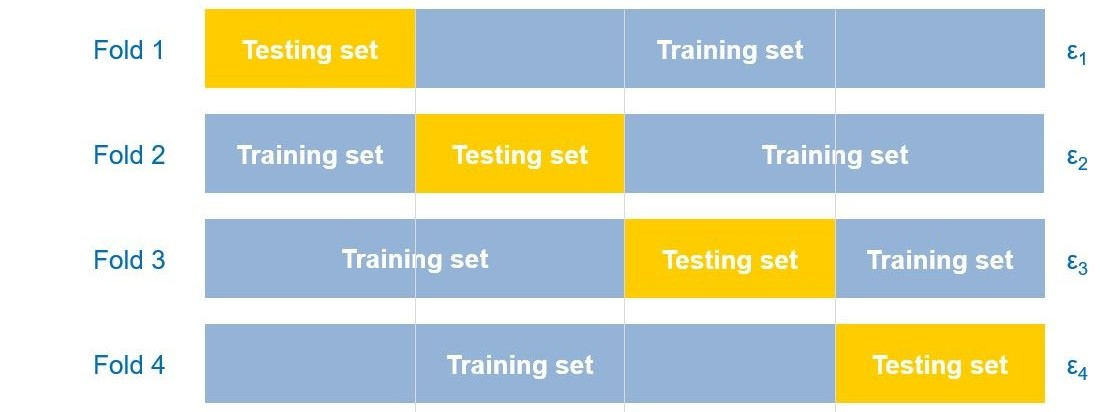
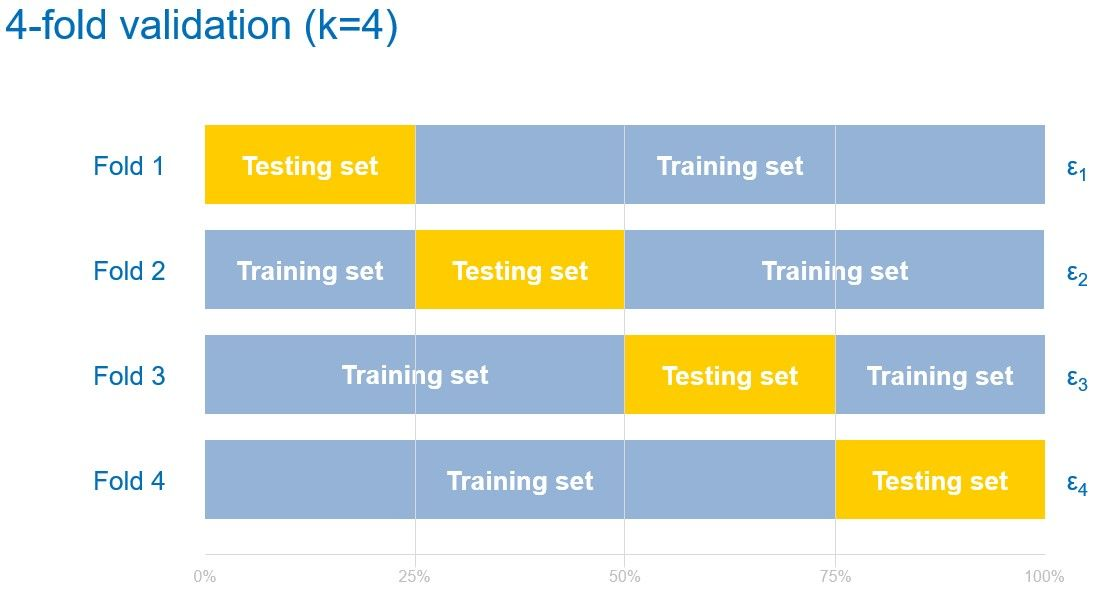

In [182]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver types
    'max_iter': [100, 200, 300, 1000]  # Number of iterations
}

# Initialize logistic regression with class weights
log_reg = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=skf, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score: ", grid_search.best_score_)

Best Parameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy Score:  0.8501616031027796


In [183]:
# Best model from grid search
log_reg_best_model = grid_search.best_estimator_ 

# Make predictions on Test set
y_pred_log_red = log_reg_best_model.predict(X_test)

# Evaluate model performance
test_accuracy_log = accuracy_score(y_test, y_pred_log_red)
test_report_log = classification_report(y_test, y_pred_log_red)

print(f"Test Accuracy: {test_accuracy_log}")
print(f"Test Classification Report:\n{test_report_log}")

Test Accuracy: 0.8648648648648649
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.86      0.90      0.88        40

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



In [184]:
print("Confusion Matrix:")
confusion_matrix_log_reg = confusion_matrix(y_test, y_pred_log_red)
print(confusion_matrix_log_reg)

Confusion Matrix:
[[28  6]
 [ 4 36]]


- The accuracy of prediction is 0.86 on the testing data set, which indicates that about 86% of the test data has been predicted correctly by the logistic regression model

---

- ### Random Forest

In [185]:
rf = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 500],   # Number of trees
    'max_depth': [None, 10, 20, 30],         # Max depth of trees
    'min_samples_split': [2, 5, 10],         # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Min samples at a leaf node
    'criterion': ['gini', 'entropy']        # Impurity criterion
}

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

In [186]:
# Fit the model with Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.84


In [187]:
# Use the best model to predict on the entire dataset (or test set)
best_rf = grid_search.best_estimator_

# Calculate feature importance
feature_importances = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

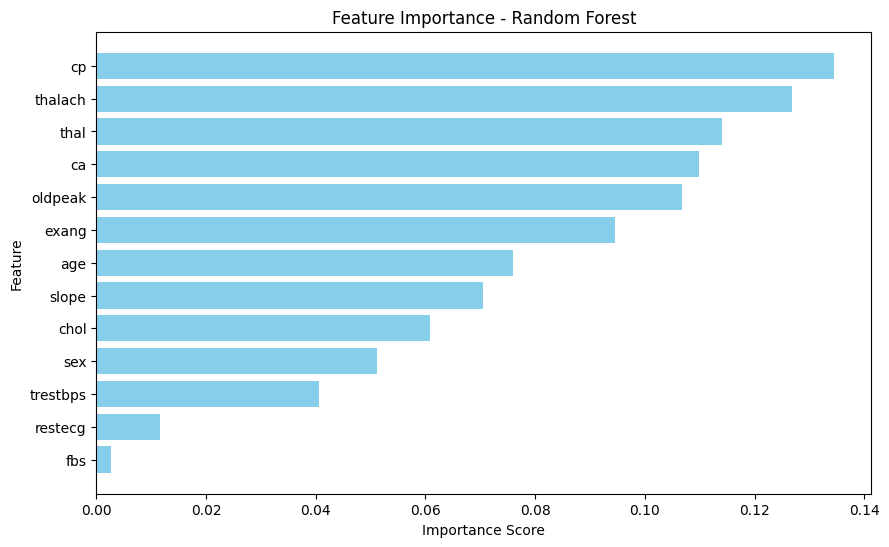

In [188]:
# Plot Variable Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [189]:
y_pred_rf = best_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy: {test_accuracy_rf}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

Test Accuracy: 0.8783783783783784
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.88      0.90      0.89        40

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74

Confusion Matrix:
[[29  5]
 [ 4 36]]


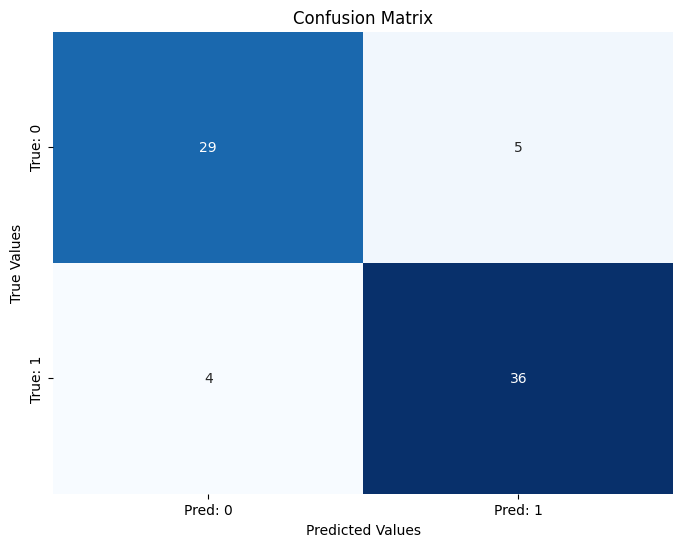

In [195]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

---

- ### XGBoost

In [191]:
# Initialize XGBoost 
xgb_model = xgb.XGBClassifier(random_state=42)

In [192]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 1, 5],
# }
param_grid = {
        'n_estimators': [50, 100, 150,200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2,5]
    }

In [197]:
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=skf, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation: ", grid_search.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation:  0.8249251700680272


In [198]:
# Best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on Test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluation
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
test_report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Test Accuracy: {test_accuracy_xgb}")
print(f"Test Classification Report:\n{test_report_xgb}")

Test Accuracy: 0.8513513513513513
Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.87      0.85      0.86        40

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



---

- ### Pipline with all models and save the best one

In [207]:
# Models and their hyperparameters
param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear', 'saga'],
        'model__max_iter': [100, 200, 300, 1000]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1, 0.2],
    },
    'AdaBoost Classifier': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1, 1.0],
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__criterion': ['gini', 'entropy']
    },
    'XGboost Classifier': {
        'model__n_estimators': [50, 100, 150, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__gamma': [0, 1, 2, 5]
    },
    'Support Vector Machine': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
    },
}

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42))
]

best_model = None
best_accuracy = 0.0

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over models
for name, model in models:
    print(f"Processing model: {name}...")
    pipeline = Pipeline([
        ('model', model)
    ])
    
    param_grid = param_grids.get(name, {})
    
    if param_grid:
        grid_search = GridSearchCV(
            pipeline,
            param_grid=param_grid,
            cv=skf,
            scoring='accuracy',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_
        y_pred = best_pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"Model: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Test Accuracy: {accuracy:.4f}\n")
    else:
        print(f"Skipping GridSearch for {name} as no parameters are provided.\n")
        best_pipeline = pipeline
        best_pipeline.fit(X_train, y_train)
        y_pred = best_pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Test Accuracy for {name}: {accuracy:.4f}\n")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_pipeline

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print("Best Model saved as 'best_model.pkl'")
print(f"Best Model: {best_model}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")


Processing model: Logistic Regression...
Model: Logistic Regression
Best Parameters: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Test Accuracy: 0.8649

Processing model: Gradient Boosting...
Model: Gradient Boosting
Best Parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 50}
Test Accuracy: 0.8108

Processing model: AdaBoost Classifier...
Model: AdaBoost Classifier
Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Test Accuracy: 0.8243

Processing model: Random Forest...
Model: Random Forest
Best Parameters: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Test Accuracy: 0.8378

Processing model: XGboost Classifier...
Model: XGboost Classifier
Best Parameters: {'model__colsample_bytree': 0.8, 'model__gamma': 5, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 150, 'model__sub

**Logistic Regression achieved the highest accuracy. It performed well, especially with its regularization and solver configuration.**